# 46 - Ejemplo de Clasificacion Multiple con PCA


* En este Notebook vamos a resolver un problema de ***Clasificación Múltiple con Regresión Logística*** en el que vamos a ***aplicar al Dataset una reducción de la dimensionalidad usando el método del PCA (Análisis de Componentes Principales)***.


* Por otro lado vamos a ***evaluar el rendimiento del modelo*** con los propios datos de entrenamiento aplicando las métricas del ***Accuracy, Precision, Recall y F1***, y viendo como clasifica el modelo con la ***matriz de confusión***.


* En los siguientes enlaces esta la documentación de las clases a utilizar:

    + Regresión Logística:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    + PCA:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    + Accuracy:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    + Precision:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
    + Recall:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
    + F1:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
    + Classification Report:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    + Matriz de confusión:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


* El ejemplo con el que vamos a trabajar, consiste en ***clasificar tres tipos de flores, conociendo los tamaños (alto y ancho) del petalo y sépalo*** de la flor; es decir, que tendremos 4 variables.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M2)
<span></span><br>
    3. [PCA: Estudio de la Varianza Acumulada](#M3)
<span></span><br>
    4. [PCA: Reducción de la dimensionalidad](#M4)
<span></span><br>
    5. [Creacción del modelo](#M5)
<span></span><br>
    6. [Evaluación del Modelo](#M6)
<span></span><br>
    7. [Visualización de Resultados](#M7)



* En primer lugar vamos a importar las librería necesarias:



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
%matplotlib inline 

<hr>


# <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo
    - ***petal_length***: El "largo" del Pétalo
    - ***petal_width***: El "ancho" del Pétalo

In [2]:
df = pd.read_csv("./data/iris/iris.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
75,6.6,3.0,4.4,1.4,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica
11,4.8,3.4,1.6,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


<hr>


# <a name="M2">2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>


* Vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length, sepal_width, petal_length, petal_with*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***)
<span></span><br><br>
    - La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números:

    - ***0***: ***Iris-Setosa***
    - ***1***: ***Iris-Versicolor***
    - ***2***: ***Iris-Virginica***


In [3]:
X = df[['sepal_length', 'sepal_width', 
        'petal_length', 'petal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas


le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

<hr>


# <a name="M3">3. PCA: Estudio de la Varianza Acumulada</a>


* Con el estudio de la Varianza Acumulada con los valores singulares, vamos a ver el ***compromiso entre la reducción de la dimensionalidad y la perdida de información***.


* Tras realizar este análisis podemos ver que cogiendo 2 componentes, reducimos en 2 variables la dimensión de nuestro dataset y nos quedamos con un 98% de la información original del Dataset:

Valores Singulares: ['25.09', '6.01', '3.42', '1.88']
Varianza Acumulada: ['0.92', '0.98', '0.99', '1.00']


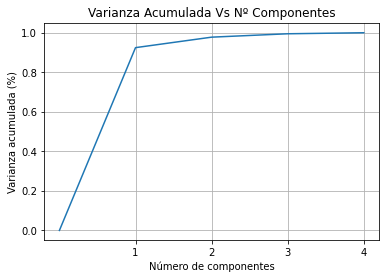

In [4]:
pca = PCA()
pca.fit(X)

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print('Valores Singulares: {s}'.format(s=['{:.2f}'.format(i) for i in pca.singular_values_]))
print('Varianza Acumulada: {v}'.format(v=['{:.2f}'.format(i) for i in varianza_acumulada]))

# Dibujamos la varianza acumulada
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.insert(varianza_acumulada, 0, 0))
ax.set_xlabel('Número de componentes')
ax.set_ylabel('Varianza acumulada (%)')
ax.set_title('Varianza Acumulada Vs Nº Componentes')
ax.grid()
ax.set_xticks(range(1, 5))
plt.show()

<hr>


# <a name="M4">4. PCA: Reducción de la dimensionalidad</a>


* Vamos a obtener el Dataset reducido con 2 componentes y vamos a ver una muestra de como quedaría nuestro nuevo Dataset:


In [5]:
pca = PCA(n_components=2)
X_latente = pca.fit_transform(X)

pd.DataFrame(X_latente, columns=['C1', 'C2']).sample(5)

,C1,C2
32,-2.647637,0.819983
103,1.970815,-0.181126
131,3.232343,1.370524
64,-0.174864,-0.251816
91,0.890160,-0.033812


<hr>


# <a name="M5">5. Creacción del modelo</a>


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.


* En este caso las variables de entrada será nuestro Dataset reducido con 2 componentes:

In [6]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo
logreg.fit(X_latente, y)

LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

* Obtenemos las funciones de decisión:

In [7]:
b0 = logreg.intercept_
b = logreg.coef_

print("\nIris-setosa: Z = {b0:0.2f} + {b1:0.2f} · C1 + {b2:0.2f} · C2"
      .format(b0=b0[0], b1=b[0,0], b2=b[0,1]))
print("\nIris-versicolor: Z = {b0:0.2f} + {b1:0.2f} · C1 + {b2:0.2f} · C2"
      .format(b0=b0[1], b1=b[1,0], b2=b[1,1]))
print("\nIris-virginica: Z = {b0:0.2f} + {b1:0.2f} · C1 + {b2:0.2f} · C2"
      .format(b0=b0[2], b1=b[2,0], b2=b[2,1]))


Iris-setosa: Z = -1.86 + -2.22 · C1 + 1.27 · C2

Iris-versicolor: Z = -0.81 + 0.24 · C1 + -1.59 · C2

Iris-virginica: Z = -3.11 + 2.51 · C1 + -0.99 · C2


<hr>


# <a name="M6">6. Evaluación del Modelo</a>


* Vamos a continuación a ver los resultados de la evaluación de nuestro modelo con los mismos datos con los que los hemos entrenado:


#### Acurracy

In [8]:
accuracy = accuracy_score(y_true=y, y_pred=logreg.predict(X_latente))
print("Accuracy = {acc}".format(acc=accuracy))

Accuracy = 0.9133333333333333


#### Precision, Recall, F1

In [9]:
classification = classification_report(y_true=y, y_pred=logreg.predict(X_latente), target_names =le.classes_)
print(classification)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.97      0.76      0.85        50
 Iris-virginica       0.80      0.98      0.88        50

       accuracy                           0.91       150
      macro avg       0.93      0.91      0.91       150
   weighted avg       0.93      0.91      0.91       150



#### Matriz de Confusión

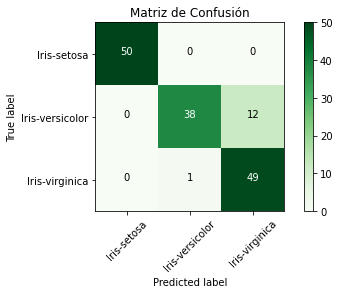

In [10]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

confusion_mx = confusion_matrix(y_true=y,y_pred=logreg.predict(X_latente))
plt.figure()
plot_confusion_matrix(confusion_mx, classes=le.classes_, title='Matriz de Confusión')
plt.show()

<hr>


# <a name="M7">7. Visualización de Resultados</a>


* Dado que estamos trabajando con 2 Componentes, podemos representar en un espacio de 2 dimensiones como clasificaría nuestro modelo en ese espacio 2D en función del valor de las componentes de cada flor:

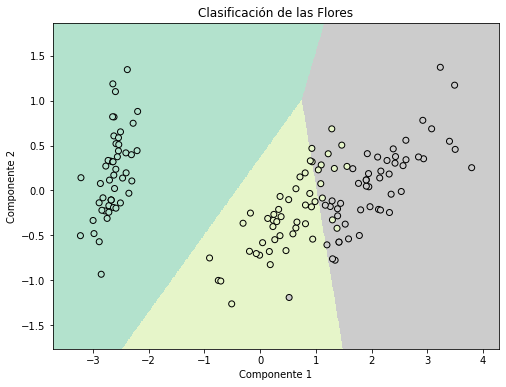

In [11]:
x_min, x_max = X_latente[:, 0].min() - .5, X_latente[:, 0].max() + .5
y_min, y_max = X_latente[:, 1].min() - .5, X_latente[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)


# Dibujamos los puntos (las componentes de las flores) del dataset
plt.scatter(X_latente[:, 0], X_latente[:, 1], c=y, edgecolors='k', cmap=plt.cm.Pastel2)

plt.title('Clasificación de las Flores')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">